In [1]:
import os
if os.getcwd().split("/")[-1] != "neurolib":
    os.chdir('..')

os.chdir('..')
datadir = os.path.join(os.getcwd(), "neurolib", "notebooks_frontiers24")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

from numba.typed import Dict
from numba.core import types

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel

from neurolib.utils.stimulus import ZeroInput
from neurolib.control.optimal_control import oc_wc, cost_functions

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

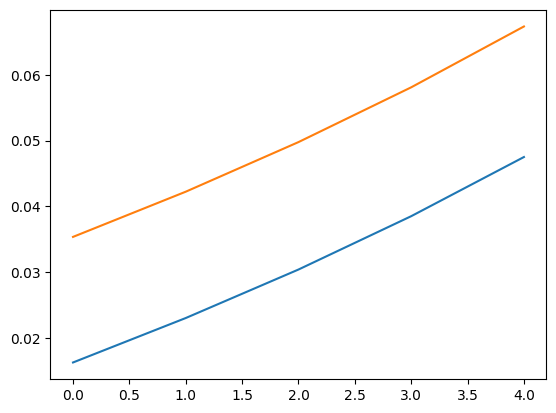

In [3]:
cmat = np.array([[0,1], [1,0]])
WC = WCModel(Cmat=cmat, Dmat=cmat)
WC.params.exc_ext_baseline = 2.
WC.params.inh_ext_baseline = 1.
WC.params.duration = 0.5

WC.run()

plt.plot(WC.exc[0,:])
plt.plot(WC.exc[1,:])
plt.show()

Optimal control with target oscillation period


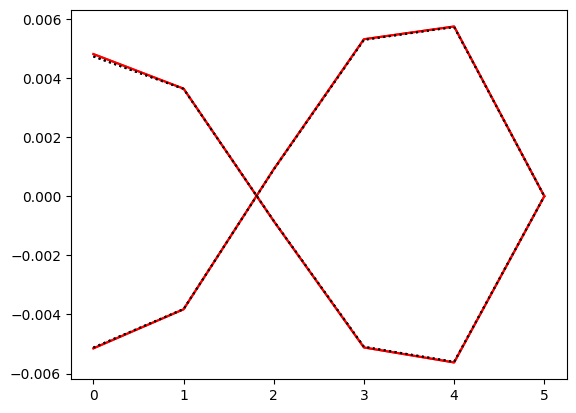

In [4]:
controlmat = np.zeros((2,2))
controlmat[:,0] = 1

costmat = np.zeros((2,2))
costmat[:,0] = 1
pr = np.arange(0,101,1)

Wcc = oc_wc.OcWc(WC, 1., print_array=pr, cost_matrix=costmat, control_matrix=controlmat)

Wcc.weights["w_p"] = 0.
Wcc.weights["w_cc"] = 1.

grad_num = Wcc.compute_gradient_num()
grad_an = Wcc.compute_gradient()

for n in range(2):
    plt.plot(grad_num[0,0,:], color="red")
    plt.plot(grad_an[0,0,:], color="black", linestyle=":")
    plt.plot(grad_num[1,0,:], color="red")
    plt.plot(grad_an[1,0,:], color="black", linestyle=":")

plt.show()